# Assignment 3 : EDA Big Data



---



#### Group : SYNA
#### Group Members
#### 1. SARAH WARDINA BINTI RAFIDIN A21EC0128
#### 2. NURUNNAJWA BINTI ZULKIFLI A21EC0121
#### 3. ALYA DAMIA BINTI HUZAIMY A21EC0159
#### 4. YASMEEN NATASHA BINTI HAFIZ SHAHREL A21EC0147





---



## 1. Dataset Selection

This dataset shows the life, work, and death of 1.22M people. It is a
structured information on the life, work and death of more than 1 million people

Source : https://www.kaggle.com/datasets/imoore/age-dataset/data

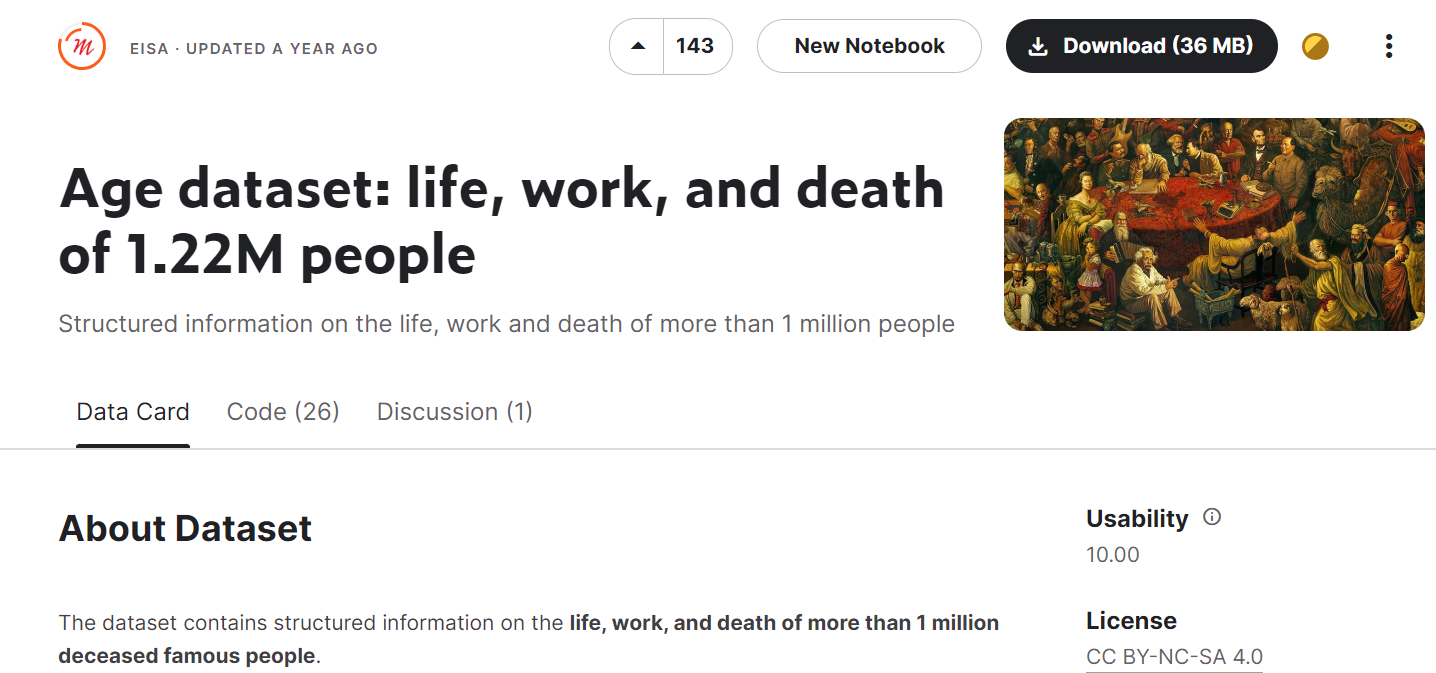



---



## 2. Data Acquisition

The dataset is in csv format.

Link : https://drive.google.com/file/d/1BeetthRHJhN7ZZk79wg2VHJra6QOCtzn/view?usp=sharing

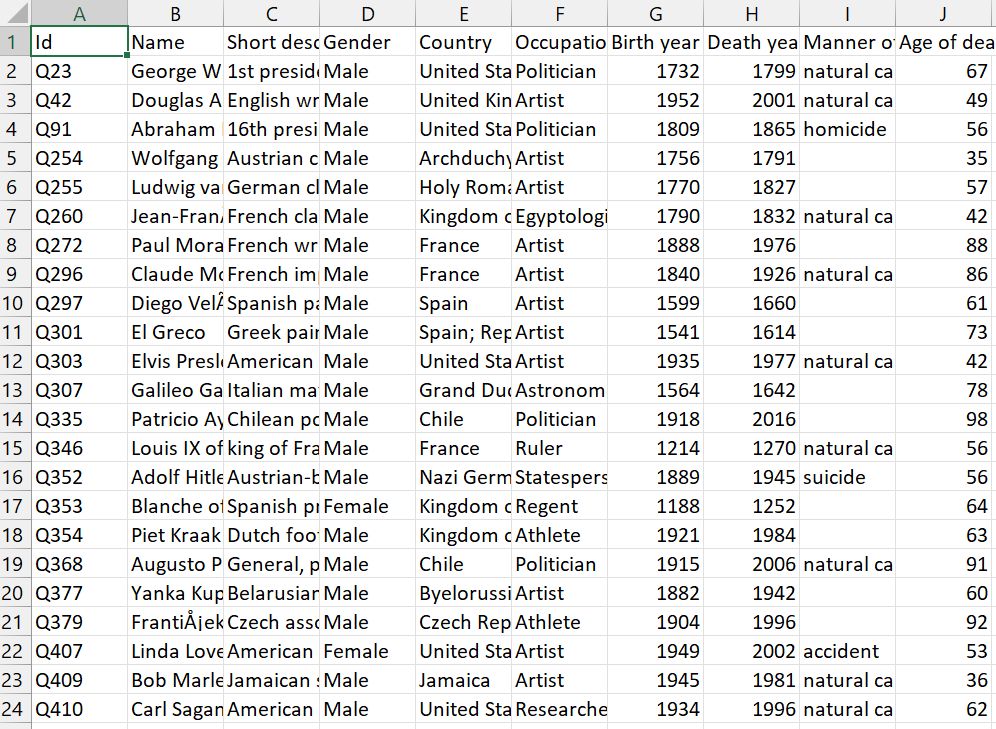



---



## 3. Setting Up the Environment

1. First, we mounted the G Drive to import the dataset
- This step is specific to Google Colab and helps you mount your Google Drive to access files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import necessary libraries

- This code imports the necessary libraries for data manipulation and analysis.

In [ ]:
import pandas as pd
import numpy as np

- *pandas* is a powerful library for data manipulation and analysis. It provides data structures like DataFrame for working with structured data, and it includes a variety of functions for cleaning, transforming, and analyzing data.

- *numpy* is a library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.


3. We need to load the dataset
- Load your dataset using Pandas. df is a common convention for a DataFrame, which is a tabular data structure in Pandas.

In [ ]:
df = pd.read_csv("drive/MyDrive/AgeDataset-V1.csv")
df

FileNotFoundError: ignored

- The table above show 1 to 25 entries of dataset

4. Display the few first line of dataset

In [ ]:
df.head()

- This shows you the first few rows of your dataset to get an overview of the data.

5. We need to explore the dataset to know more depth about the dataset

In [ ]:
df.info()

- These commands provide information about the dataset, such as data types, missing values, and statistics.

**DataFrame Information** :

- <class 'pandas.core.frame.DataFrame'>: This line indicates that the variable is a Pandas DataFrame.
Index Information:

- RangeIndex: 1223009 entries, 0 to 1223008: The index information shows that the DataFrame has a RangeIndex (similar to Python's built-in range) with 1223009 entries, ranging from 0 to 1223008.
Column Information:

- Data columns (total 10 columns): There are a total of 10 columns in the DataFrame.

**Column Details**:

- Each column is listed with its name, the number of non-null (non-missing) values, and the data type.
- Non-Null Count: Indicates how many non-null values are present in each column.
- Dtype: Specifies the data type of each column.

**Memory Usage Information**:

- memory usage: 93.3+ MB: Shows the memory usage of the DataFrame. The + indicates that this is an estimate, and the actual memory usage might be higher.



---



## 4. Data Preprocessing

6. Now, we need to handle missing values

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

- In simple terms, df.fillna(df.mode().iloc[0], inplace=True) fills in missing values in the DataFrame with the most frequent value (mode) of each column. It's a common strategy for handling missing values in categorical or discrete data where using the mode makes sense.

- For example, if you have a column representing death cause and some entries are missing, this line of code would fill those missing values with the most common death cause in the dataset.







In [ ]:
df.drop(df[df['Age of death'] == 0].index, inplace=True)

7. We handle the duplicates value invour dataset

In [ ]:
df.drop_duplicates(inplace=True)

- The entire line of code is dropping (removing) the rows from the DataFrame where the 'Age of death' column has a value of 0. The changes are applied directly to the original DataFrame. After running this line, the DataFrame will no longer contain rows where 'Age of death' is equal to 0.

- Here, we remove duplicate rows from dataset.

In [ ]:
df.head()

In [ ]:
df.tail()

- The df.head() and df.tail() functions are used in Pandas to display the first few and last few rows of a DataFrame, respectively. They are helpful for quickly inspecting the structure and contents of the DataFrame.

- This is useful for getting a quick glimpse of the dataset, understanding the column names, and checking the initial values.

In [ ]:
df.info()

- In this dataset, it seems that there are no missing values in any of the columns, as the "Non-Null Count" for each column is equal to the total number of entries (1223007).

In [ ]:
for column in  df.columns:
  if df[column].dtype == 'float64':
    df[column]=df[column].astype('float16')
  if df[column].dtype == 'int64' :
    df [column]= df[column].astype('int16')

In [ ]:
df.info()

8. After cleaning, we can save our dataset as *Cleaned_AgeDataset_SYN.csv*

In [ ]:
cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"
df.to_csv(cleaned_file_path, index=False)

9. Now, we can confirm the changes.

In [ ]:
df.info()

In [ ]:
df.head()

10. Now, we have finished the data prepping and cleaning.

### Importing the Libraries


In [ ]:
import pandas as pd
import gc
import glob
import os

#### Chunking

In [ ]:
import pandas as pd

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000 # Adjust this value based on your preferences

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Process each chunk as needed
    # For example, you can print the shape of each chunk
    print(f"Chunk {i+1} Shape: {chunk.shape}")

    # Perform additional processing on each chunk if necessary

    # Save the chunk to a separate CSV file
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)


In [ ]:
# Information about the chunk
chunk_info = f"Chunk {i+1} Info:\n{chunk.info()}\n"

# Print or log the chunk information
print(chunk_info)


In [ ]:
# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):

    print(f"Exploratory Data Analysis for Chunk {i+1}:")

    # Display basic statistics for numerical columns
    print(chunk.describe())

    # Display the first few rows of the chunk
    print(chunk.head())

    # Display the data types of columns
    print(chunk.dtypes)



---



## Exploratory Data Analysis

Perform the following EDA tasks using big data tools:

a. Summary Statistics: Compute basic statistics such as mean, median, standard deviation, and quantiles for relevant numerical variables.

b. Data Visualization: Create visualizations like histograms, box plots, scatter plots, and heatmaps to understand data distributions, correlations, and outliers.

c. Data Exploration: Explore the dataset's structure and identify any patterns, trends, or anomalies. Pay attention to variables' distributions, relationships, and potential insights.

d. Feature Engineering: If applicable, create new features or transform existing ones to better support your analysis.



---



### a. Summary Statistics

Compute basic statistics such as mean, median, standard deviation, and quantiles for relevant numerical variables.

1. Import pandas library

In [ ]:
import pandas as pd

2. Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Cleaned_AgeDataset_SYN.csv")
df

FileNotFoundError: ignored

3. Extract the 'Age of Death' column

In [ ]:
age_of_death_column = df['Age of death']

4. Compute basic statistics



> Mean















In [ ]:
mean_age = age_of_death_column.mean()

In [ ]:
print(f"Mean: {mean_age}")



> Median



In [ ]:
median_age = age_of_death_column.median()

In [ ]:
print(f"Median: {median_age}")



> Standard deviation



In [ ]:
std_dev_age = age_of_death_column.std()

In [ ]:
print(f"Standard Deviation: {std_dev_age}")



> 25th Quantiles



In [ ]:
quantile_25_age = age_of_death_column.quantile(0.25)

In [ ]:
print(f"25th Percentile: {quantile_25_age}")



> 75th Quatiles



In [ ]:
quantile_75_age = age_of_death_column.quantile(0.75)

In [ ]:
print(f"75th Percentile: {quantile_75_age}")

To perform an Exploratory Data Analysis (EDA) on this dataset, we'll use Python with the pandas library for data manipulation and analysis.

**Tools and Libraries Used:**

1. **Python:** A versatile programming language.
2. **Pandas:** A powerful data manipulation library.

**Steps Taken:**

1. **Data Loading:** Loaded the dataset using the pandas.read_csv() function.
2. **Overview of the Dataset:** Checked the structure of the dataset using df.head() to view the first few rows.
3. **Key Findings and Insights:** The summary statistics (mean, median, standard deviation, quantiles) offer numerical insights into the central tendency and spread of the "Age of Death" column.




---



### b. Data Visualization
Create visualizations like histograms, box plots, scatter plots, and heatmaps to understand data distributions, correlations, and outliers.

1. Import neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. From the Summary Statistics above, create a visualisation to understand data distributions.


In [ ]:
# Extract the 'Age of Death' column
age_of_death_column = df['Age of death']

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

In [ ]:
# Visualize data distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(age_of_death_column, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Age of Death')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Visual explanation
- The histogram for the 'Age of Death' dataset visually displays the distribution of ages. The X-axis represents age ranges, the Y-axis shows the frequency of individuals in each range, and bars depict the count within specific age intervals. The shape indicates the distribution's symmetry or skewness, and the central peak denotes the most common age of death.

In [ ]:
# Visualize data distribution using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=age_of_death_column, color='lightcoral')
plt.title('Box Plot of Age of Death')
plt.xlabel('Age')
plt.show()

Visualisation explanation:
- The box plot offers a concise summary of the distribution of the 'Age of Death' dataset. The central box represents the interquartile range (IQR), spanning from the 25th to the 75th percentiles, with the median marked by a line inside the box. The whiskers extend to the minimum and maximum values within a set range, typically 1.5 times the IQR. Outliers, presented as individual points beyond the whiskers, are easily identified.

3. From the Summary Statistics above, create a visualisation to understand data correlations.

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Visual explanation
- The heatmap visually represents the correlation of the 'Age of Death' column with itself. The diagonal line is uniformly red, indicating a perfect correlation (1.0) as expected for any variable correlated with itself. The heatmap provides a concise and immediate confirmation of the high correlation within the dataset.

In [ ]:
# Plot a pair plot for Age of Death
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.suptitle('Pair Plot for Age of Death', y=1.02)
plt.show()

Visual explanation:
- The pair plot visually summarizes the 'Age of Death' dataset, displaying histograms along the diagonal for individual variable distributions and scatter plots below and above the diagonal, indicating the correlation of the variable with itself. In this specific case, it reaffirms the perfect positive correlation of the 'Age of Death' variable with itself.



---



### c. Data Exploration

Explore the dataset's structure and identify any patterns, trends, or anomalies. Pay attention to variables' distributions, relationships, and potential insights.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"
df.to_csv(cleaned_file_path, index=False)

NameError: ignored

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape()

In [ ]:
df.info()

In [ ]:
df.describe()



---



### d. Feature Engineering

If applicable, create new features or transform existing ones to better support your analysis.

- We need to mounted the Google Drive. It establishes a connection between your Colab environment and Google Drive, enabling easy access to files and data stored in your Google Drive within the Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- Once you've identified the path to your dataset, you can use pandas to read the data into a DataFrame. For example, reading a CSV file

In [ ]:
df = pd.read_csv("drive/MyDrive/Cleaned_AgeDataset_SYN.csv")

- After that, we display the type of each dataset

In [ ]:
import pandas as pd

# Convert 'Death year' from float to int
df['Death year'] = df['Death year'].astype(int)

# Convert 'Age of death' from float to int
df['Age of death'] = df['Age of death'].astype(int)

# Display the updated data types
print(df.dtypes)


Question: Can we create a feature to capture the time span between 'Birth year' and 'Death year'?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Lists to accumulate life span values from all chunks
all_life_span_values = []

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Process each chunk as needed
    # For example, calculate 'Life Span' for each chunk
    chunk['Life Span'] = chunk['Death year'] - chunk['Birth year']

    # Plot histogram for each chunk
    plt.figure(figsize=(10, 8))
    sns.histplot(chunk['Life Span'].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of Life Span - Chunk {i+1}')
    plt.show()

    # Accumulate life span values from each chunk
    all_life_span_values.extend(chunk['Life Span'].dropna().tolist())

    # Perform additional processing on each chunk if necessary

    # Save the chunk to a separate CSV file with 'Life Span' information
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# Plot the histogram for all accumulated life span values
plt.figure(figsize=(10, 8))
sns.histplot(all_life_span_values, bins=30, kde=True)
plt.title('Distribution of Life Span - All Chunks')
plt.show()

# Calculate and display the average life span
average_life_span = sum(all_life_span_values) / len(all_life_span_values)
print(f'Average Life Span across all chunks: {average_life_span}')


**Code Explanation**

This code ensures that the 'Death year' and 'Age of death' columns in the DataFrame have integer data types rather than float data types. This can be useful for working with these columns in a more appropriate numerical format, especially if the fractional part of the float values is not relevant in this context.

**Visual Explanation**

In the process of feature engineering, we computed the life span for each individual by subtracting the birth year from the death year. The resulting life span values provide insights into the overall age distribution within the dataset, revealing that the average life span observed is 69.28 or 70 years old. This suggests that a significant portion of individuals in the dataset lived up to the age of 70.

Question : What is the top 3 manners of death and it life span?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Create an empty DataFrame to store aggregated data
combined_df = pd.DataFrame()

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Process each chunk as needed
    # For example, calculate 'Life Span' for each chunk
    chunk['Life Span'] = chunk['Death year'] - chunk['Birth year']

    # Append the chunk to the combined DataFrame
    combined_df = combined_df.append(chunk, ignore_index=True)

    # Perform additional processing on each chunk if necessary

    # Save the chunk to a separate CSV file with 'Life Span' information
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# 'Manner of death' is just a placeholder, and you may need to adjust it.
top_manners_of_death = combined_df['Manner of death'].value_counts().head(3).index

# Filter the combined DataFrame for the top three manners of death
combined_df_top_manners = combined_df[combined_df['Manner of death'].isin(top_manners_of_death)]

# Create a facet grid for the combined data
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(combined_df_top_manners, col='Manner of death', height=6)
g.map(sns.histplot, 'Life Span', bins=30, kde=True)

# Set axis labels and titles
g.set_axis_labels('Life Span', 'Count')
g.set_titles(col_template="{col_name}")
plt.suptitle('Distribution of Life Span by Top Three Manners of Death (Combined)', y=1.02)
plt.show()


**Code Explanation**

- Read the CSV file in chunks using pd.read_csv and process each chunk. In this example, it calculates the 'Life Span' for each row in the chunk, appends the chunk to combined_df, and saves the chunk to a separate CSV file.

- We initializes a Seaborn FacetGrid, which is a grid of subplots based on the 'Manner of death' column. Each subplot will represent one of the top three manners of death.

- This code is to maps histograms of the 'Life Span' column onto the FacetGrid. Each subplot will display the distribution of life spans for a specific manner of death, with specified histogram binning and a kernel density estimate (kde) overlay.



**Visual Explanation**

- From the graph above, we can see that natural causes is the main reason of highest death at 75 years old compared to suicide and accident. Regarding the cause of death, the predominant manner is identified as 'natural causes.'

- A 'natural' death is characterized by internal factors leading to the cessation of vital functions, such as cancer, heart disease, or diabetes. Notably, instances of death attributed to suicide or accidents are relatively infrequent.

Question: How can we represent the diversity of top 5 'Occupation' within each 'Country'?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Lists to accumulate chunks
all_chunks = []

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Perform additional processing on each chunk if necessary

    # Feature Engineering on each chunk
    chunk['Occupation Diversity'] = chunk.groupby('Country')['Occupation'].transform('nunique')

    # Append the chunk to the list
    all_chunks.append(chunk)

    # Save the chunk to a separate CSV file if needed
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# Combine all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

# Create a pivot table to summarize occupation diversity by country
occupation_diversity_table = pd.pivot_table(df_combined, values='Occupation Diversity', index='Country', aggfunc='mean')

# Get the top 5 countries by occupation diversity
top_countries = occupation_diversity_table.nlargest(5, 'Occupation Diversity')

# Display the table for the top 5 countries
print(top_countries)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Lists to accumulate chunks
all_chunks = []

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Perform additional processing on each chunk if necessary

    # Feature Engineering on each chunk
    chunk['Occupation Diversity'] = chunk.groupby('Country')['Occupation'].transform('nunique')

    # Append the chunk to the list
    all_chunks.append(chunk)

    # Save the chunk to a separate CSV file if needed
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# Combine all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

# Feature Engineering on the combined DataFrame
df_combined['Occupation Diversity'] = df_combined.groupby('Country')['Occupation'].transform('nunique')

# Create a pivot table to summarize occupation diversity by country
occupation_diversity_table = pd.pivot_table(df_combined, values='Occupation Diversity', index='Country', aggfunc='mean')

# Get the top 5 countries by occupation diversity
top_countries = occupation_diversity_table.nlargest(5, 'Occupation Diversity')

# Create a bar plot with numbers above the bars
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_countries.index, y='Occupation Diversity', data=top_countries)

# Annotate each bar with its value
for index, value in enumerate(top_countries['Occupation Diversity']):
    barplot.text(index, value + 0.1, str(round(value, 2)), ha='center', va='bottom')

plt.title('Top 5 Countries by Occupation Diversity')
plt.xlabel('Country')
plt.ylabel('Occupation Diversity')
plt.show()


**Code Explanation**

- This code creates a pivot table (occupation_diversity_table) using pandas' pivot_table function. The table summarizes the mean (average) value of 'Occupation Diversity' for each unique 'Country.'

- It extracts the top 5 countries with the highest average occupation diversity from the pivot table.



**Visual Explanation**

- Upon analyzing the dataset, it becomes evident that a substantial portion of the individuals predominantly worked in the United States. The dataset exhibits occupational diversity, with 4416 distinct occupations recorded, closely followed by France with 1610 occupations. This observation aligns well with the concept of the 'American Dream.'

Question: Can we create a binary feature indicating whether the person died at an older age than the average age of death in their 'Country'?

In [ ]:
import pandas as pd

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Lists to accumulate chunks
all_chunks = []

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Perform additional processing on each chunk if necessary

    # Calculate the average age of death for each country in each chunk
    average_age_by_country_chunk = chunk.groupby('Country')['Age of death'].mean()

    # Merge the average age back into the original chunk
    chunk = pd.merge(chunk, average_age_by_country_chunk.rename('Average Age'), left_on='Country', right_index=True)

    # Create a binary feature indicating whether the person died at an older age than the average age of death in their country
    chunk['Older than Average Age'] = chunk['Age of death'] > chunk['Average Age']

    # Drop the 'Average Age' column if you don't need it in your final DataFrame
    chunk = chunk.drop('Average Age', axis=1)

    # Append the chunk to the list
    all_chunks.append(chunk)

    # Save the chunk to a separate CSV file if needed
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# Combine all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

# Display the updated DataFrame
df_combined.head()


**Code Explanation**

This code explain groups the DataFrame 'df' by the 'Country' column and calculates the mean (average) of the 'Age of death' column for each group (i.e., each country). The result is a Pandas Series where each country is associated with its average age of death.

**Visual Explanation**

In summary, the "Older than Average Age" column is a binary feature that helps categorize individuals based on whether they died at an age above or below the average age of death in their respective countries. This can be useful for exploring patterns related to age and mortality in different geographic regions.

In [ ]:
import pandas as pd

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Lists to accumulate chunks
all_chunks = []

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Perform additional processing on each chunk if necessary

    # Calculate the average age of death for each country in each chunk
    average_age_by_country_chunk = chunk.groupby('Country')['Age of death'].mean()

    # Merge the average age back into the original chunk
    chunk = pd.merge(chunk, average_age_by_country_chunk.rename('Average Age'), left_on='Country', right_index=True)

    # Create a binary feature indicating whether the person died at an older age than the average age of death in their country
    chunk['Older than Average Age'] = chunk['Age of death'] > chunk['Average Age']

    # Append the chunk to the list
    all_chunks.append(chunk)

    # Save the chunk to a separate CSV file if needed
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# Combine all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

# Count the number of people who died at an older age than the average age and those with age less than or equal to the average age
age_comparison_counts_combined = df_combined['Older than Average Age'].value_counts()

# Display the counts
print("Number of people who died at an older age than the average age:")
print(age_comparison_counts_combined[True])

print("\nNumber of people with age less than or equal to the average age:")
print(age_comparison_counts_combined[False])

# Drop the 'Average Age' column if you don't need it in your final DataFrame
df_combined = df_combined.drop('Average Age', axis=1)

# Display the updated DataFrame
df_combined.head()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_file_path = "/content/drive/MyDrive/Cleaned_AgeDataset_SYN.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Lists to accumulate chunks
all_chunks = []

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_path, chunksize=chunk_size)):
    # Perform additional processing on each chunk if necessary

    # Calculate the average age of death for each country in each chunk
    average_age_by_country_chunk = chunk.groupby('Country')['Age of death'].mean()

    # Merge the average age back into the original chunk
    chunk = pd.merge(chunk, average_age_by_country_chunk.rename('Average Age'), left_on='Country', right_index=True)

    # Create a binary feature indicating whether the person died at an older age than the average age of death in their country
    chunk['Older than Average Age'] = chunk['Age of death'] > chunk['Average Age']

    # Append the chunk to the list
    all_chunks.append(chunk)

    # Save the chunk to a separate CSV file if needed
    chunk.to_csv(f"{cleaned_file_path}_chunk_{i+1}.csv", index=False)

# Combine all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

# Count the number of people who died at an older age than the average age and those with age less than or equal to the average age
age_comparison_counts_combined = df_combined['Older than Average Age'].value_counts()

# Plot a bar graph with total numbers on top of each bar
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=age_comparison_counts_combined.index, y=age_comparison_counts_combined.values)

# Add total numbers on top of each bar
for i, value in enumerate(age_comparison_counts_combined.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Number of People by Age Comparison')
plt.xlabel('Age Comparison')
plt.ylabel('Count')
plt.xticks([0, 1], ['Older than Average Age', 'Less than or Equal to Average Age'])
plt.show()

# Drop the 'Average Age' column if you don't need it in your final DataFrame
df_combined = df_combined.drop('Average Age', axis=1)

# Display the updated DataFrame
df_combined.head()


**Code Explanation**

This line calculates the average age of death for each country using the 'groupby' and 'mean' functions in Pandas. It creates a Pandas Series called 'average_age_by_country' where each country is associated with its average age of death.



**Visual Explanation**

The final graphical representation illustrates a comparison between individuals who passed away at an age older than the average and those who died at an age less than or equal to the average death age. The data indicates that 682020 individuals fall into the former category, while 540749 individuals fall into the latter. This discrepancy can be attributed to various lifestyle factors influencing the longevity of individuals in the dataset.